In [1]:
import pandas as pd
import numpy as np

iowa_df = pd.read_csv("3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv")
list1 = ['Race - Ethnicity', 'Age At Release ', 'Sex', 'Offense Classification', 'Offense Type', 'Return to Prison']

In [2]:
# compas_df = pd.read_csv("compas-scores-raw.csv")
# compas_df

In [3]:
compas_par_df = pd.read_csv("cox-violent-parsed.csv")
compas_par_df

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,...,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,...,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,5.0,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,...,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18311,NaN,alexsandra beauchamps,alexsandra,beauchamps,29/12/2014,Female,21/12/1984,31,25 - 45,African-American,...,Risk of Violence,4,Low,29/12/2014,28/12/2014,07/01/2015,5,9,459,0
18312,NaN,winston gregory,winston,gregory,14/01/2014,Male,01/10/1958,57,Greater than 45,Other,...,Risk of Violence,1,Low,14/01/2014,13/01/2014,14/01/2014,0,0,808,0
18313,NaN,farrah jean,farrah,jean,09/03/2014,Female,17/11/1982,33,25 - 45,African-American,...,Risk of Violence,2,Low,09/03/2014,08/03/2014,09/03/2014,3,0,754,0
18314,NaN,florencia sanmartin,florencia,sanmartin,30/06/2014,Female,18/12/1992,23,Less than 25,Hispanic,...,Risk of Violence,4,Low,30/06/2014,15/03/2015,15/03/2015,2,0,258,0


In [4]:
test_df = iowa_df[list1]


race={'Black - Non-Hispanic':1,
      'White - Non-Hispanic':2,
      'American Indian or Alaska Native - Non-Hispanic':3,
      'White - Hispanic':4,
      'American Indian or Alaska Native - Hispanic':5,
      'Asian or Pacific Islander - Non-Hispanic':6,
      'White -':7,
      'Black - Hispanic':8,
      'Black -':9,
      'Asian or Pacific Islander - Hispanic':10,
      'N/A -':0,
      np.nan:0
     }
age={'Under 25':1,
     '25-34':2, 
     '35-44':3, 
     '45-54':4,  
     '55 and Older':5, 
     np.nan:0
    }
sex={'Male':1, 
     'Female':2,
     np.nan:0
    }
offenseC={'A Felony':1,
         'B Felony':2,
         'C Felony':3,
         'D Felony':4,
         'Other Felony':5,
         'Felony - Enhanced':6,
         'Other Felony (Old Code)':7,
         'Felony - Mandatory Minimum':8,
         'Felony - Enhancement to Original Penalty':9,
         'Simple Misdemeanor':10,
         'Aggravated Misdemeanor':11,
         'Serious Misdemeanor':12,
         'Sexual Predator Community Supervision':13,
         'Other Misdemeanor':14,
         'Special Sentence 2005':15
        }
offenceT={'Violent':1, 
          'Property':2, 
          'Public Order':3,
          'Drug':4, 
          'Other':0}
recidivism={'Yes':1,
            'No':0}
test_df.columns=['Race','Age','Sex','Classification','Type','Recidivism']
test_df.Race = [race[item] for item in test_df.Race] 
test_df.Age = [age[item] for item in test_df.Age]
test_df.Sex = [sex[item] for item in test_df.Sex] 
test_df.Classification = [offenseC[item] for item in test_df.Classification] 
test_df.Type = [offenceT[item] for item in test_df.Type] 
test_df.Recidivism = [recidivism[item] for item in test_df.Recidivism] 

test_df

C:\Users\mattk\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Race,Age,Sex,Classification,Type,Recidivism
0,1,2,1,3,1,1
1,2,2,1,4,2,1
2,2,3,1,2,4,1
3,2,2,1,2,0,0
4,1,3,1,4,1,1
...,...,...,...,...,...,...
26015,4,1,1,3,1,0
26016,2,3,1,3,1,0
26017,2,2,2,11,3,0
26018,2,2,1,4,2,0


In [5]:
X= test_df.values[:, 0:5]
print(str(X.shape))

(26020, 5)


In [6]:
Y= test_df.values[:,5:]
print(str(Y.shape))

(26020, 1)


In [7]:
x_train = X[0:15000]
print(x_train.shape)
x_test = X[15000:]

print(x_test.shape)
y_tr = Y[0:15000]
y_te = Y[15000:]


(15000, 5)
(11020, 5)


In [8]:
from sklearn import linear_model
reg = linear_model.LinearRegression().fit(x_train,y_tr) #needs to be a classification model instead

y_hat_score = reg.predict(x_test)
y_te.sort()
# for i in range(len(y_hat_score)):
#     print(y_hat_score[i],y_te[i])
    
y_hat_score.sort()
# print(y_hat_score)

In [9]:
list2 = ['sex', 'age', 'race', 'priors_count', 'is_violent_recid']
test2_df = compas_par_df[list2]

sex1={'Male':1, 
     'Female':2,
     np.nan:0
    }
race1={'Other':0,
     'Native American':0,
     'African-American':1,
     'Hispanic':2,
     'Caucasian':3,
     'Asian':4,
     np.nan:0}
test2_df.columns = ['Sex','Age','Race','Priors_Count','is_violent_recid']
test2_df.Sex = [sex1[item] for item in test2_df.Sex] 
test2_df.Race = [race1[item] for item in test2_df.Race]

test2_df

C:\Users\mattk\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Sex,Age,Race,Priors_Count,is_violent_recid
0,1,69,0,0,0
1,1,69,0,0,0
2,1,31,3,0,0
3,1,34,1,0,1
4,1,24,1,4,0
...,...,...,...,...,...
18311,2,31,1,5,0
18312,1,57,0,0,0
18313,2,33,1,3,0
18314,2,23,2,2,0


In [44]:
X1 = test2_df.values[:,0:4]
Y1 = test2_df.values[:,4:]

x1_train = X1[0:14500]
y1_train = Y1[0:14500]
x1_test = X1[14500:]
y1_test = Y1[14500:]

compas_model = linear_model.LinearRegression().fit(x1_train,y1_train)

y_hat_compas = compas_model.predict(x1_test)
# /print(y_hat_compas)

In [11]:
#check accuracy vs percision
# look at fairness in the algorithm compared to the compas data

In [22]:
def threshold_predictions(y_hat_score, threshold):
    # YOUR CODE HERE
    output_list = []
    for i in range(len(y_hat_score)):
        if y_hat_score[i] <= threshold:
            output_list.append(0)
        else:
            output_list.append(1)
    return output_list

y_hat_new = threshold_predictions(y_hat_score, 0.25)


In [13]:
def true_positive_rate(y, y_hat):
    tn = tp = fn = fp = 0
    for i in range(len(y_hat)):
        if(y[i] == 0 and y_hat[i] == 0):
            tn+=1
        elif(y[i] == 1 and y_hat[i] == 1):
            tp+=1
        elif(y[i] == 0 and y_hat[i] == 1):
            fp+=1
        else:
            fn+=1
    return tp/(tp+fn)

def false_positive_rate(y, y_hat):
    tn = tp = fn = fp = 0
    for i in range(len(y_hat)):
        if(y[i] == 0 and y_hat[i] == 0):
            tn+=1
        elif(y[i] == 1 and y_hat[i] == 1):
            tp+=1
        elif(y[i] == 0 and y_hat[i] == 1):
            fp+=1
        else:
            fn+=1
    return fp/(fp+tn)

def accuracy_rate(y, y_hat):
    tn = tp = fn = fp = 0
    for i in range(len(y_hat)):
        if(y[i] == 0 and y_hat[i] == 0):
            tn+=1
        elif(y[i] == 1 and y_hat[i] == 1):
            tp+=1
        elif(y[i] == 0 and y_hat[i] == 1):
            fp+=1
        else:
            fn+=1
    return (tp+tn)/(fp+tn+fn+tp)

In [72]:
print(str(round(accuracy_rate(Y,y_hat_new),4)) + " accuracy rate for iowa data")
print(str(round(false_positive_rate(Y, y_hat_new),4)) + " false positive rate for iowa data")
print(str(round(true_positive_rate(Y, y_hat_new),4)) + " true positive rate for iowa data")

0.3483 accuracy rate for iowa data
0.879 false positive rate for iowa data
0.872 true positive rate for iowa data


In [69]:
n = threshold_predictions(y_hat_compas,0.095)
compas_acc = round(accuracy_rate(Y1,n),4)
print(str(compas_acc) + " accuracy for comaps data based on our own model")
print(str(round(false_positive_rate(Y1,n),4)) + " false positive rate for comaps data, based on our own model")
print(str(round(true_positive_rate(Y1,n),4)) + " true positive rate for comaps data, based on our own model")
# print(1-compas_acc)

0.685 accuracy for comaps data based on our own model
0.2794 false positive rate for comaps data, based on our own model
0.3058 true positive rate for comaps data, based on our own model


In [67]:
black1 = []
white1 = []
hispan = []
asian1 = []
other3 = []
for i in range(len(y_hat_new)):
    row = test_df.iloc[i]
    if row['Race']==1 or row['Race'] == 8 or row['Race'] == 9:
        black1.append(y_hat_new[i])
#         print(i,y_hat_new[i])
    elif row['Race']==7 or row['Race']==2:
        white1.append(y_hat_new[i])
    elif row['Race']==4:
        hispan.append(y_hat_new[i])
    elif row['Race']==6 or row['Race']==10:
        asian1.append(y_hat_new[i])
    elif row['Race']==3 or row['Race']==5:
        other3.append(y_hat_new[i])
# print(black1)

bsum = wsum = hsum = asum = osum = 0
for i in range(len(black1)):
    if black1[i] == 1:
        bsum+=1
for i in range(len(white1)):
    if white1[i] == 1:
        wsum+=1
for i in range(len(hispan)):
    if hispan[i] == 1:
        hsum+=1
for i in range(len(asian1)):
    if asian1[i] == 1:
        asum+=1
for i in range(len(other3)):
    if other3[i] == 1:
        osum+=1
        
print(str(bsum/len(black1)) + " mean predictions for Afircan-Americans")
print(str(wsum/len(white1)) + " mean predictions for Whites")
print(str(hsum/len(hispan)) + " mean predictions for Hispanics")
print(str(asum/len(asian1)) + " mean predictions for Asians")
print(str(osum/len(other3)) + " mean predictions for other races")

0.8795592705167173 mean predictions for Afircan-Americans
0.8767888782881287 mean predictions for Whites
0.8724279835390947 mean predictions for Hispanics
0.8375 mean predictions for Asians
0.8726415094339622 mean predictions for other races


In [16]:
def compute_roc_curve(y, y_hat_score, num_thresholds):
    # Your code here
    thresh = 0.00
    #increment = 1/num_thresholds
    tpr_res = []
    fpr_res = []
    for i in range(num_thresholds):
        new_t = threshold_predictions(y_hat_score, thresh)
        tpr_res.append(true_positive_rate(y,new_t))
        fpr_res.append(false_positive_rate(y,new_t))
        thresh += 1/num_thresholds

    return tpr_res, fpr_res

In [34]:
tpr, fpr = compute_roc_curve(Y, y_hat_score, 50)
tpr_c,fpr_c = compute_roc_curve(Y1,y_hat_compas,200)

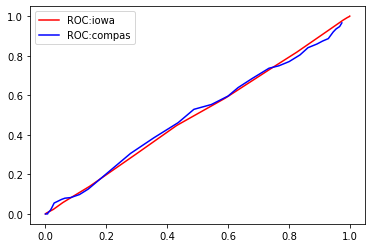

In [66]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.plot(fpr,tpr, label = "ROC:iowa", c='r')
plt.plot(fpr_c,tpr_c, label = "ROC:compas", c='b')
plt.legend()
plt.show()
